# Tarea realizada por Jesús Martínez Leal
Última edición: 16/02/2024

In [61]:
%matplotlib inline

# Métodos de manifold no lineales.

La idea principal detrás del manifold learning es que los datos de alta dimensionalidad a menudo se distribuyen cerca de un manifold, que es una superficie de dimensionalidad menor incrustada en el espacio de alta dimensionalidad. Este manifold puede ser retorcido o curvado de manera no lineal. Los algoritmos de manifold learning intentan inferir la estructura del manifold a partir de los datos observados y luego mapearlos a un espacio de dimensionalidad más baja mientras se conservan las relaciones entre las muestras.


# Reducción de dimensionalidad de Swissroll y Sphere

1. Aplica los *spectral embedding, LLE, Isomap y MDS* a los conjuntos de datos "rollo suizo" y "esfera" con n_neighbours=12 y compara los resultados obtenidos.
2. Aplica las diferentes variantes de LLE implementadas en sklearn con estos 2 conjuntos de datos.
3. Contesta a las preguntas.

- Locally Linear Embedding (LLE): Este algoritmo preserva las relaciones locales entre las muestras, asumiendo que los datos son aproximadamente lineales dentro de vecindarios locales. En LLE se utilizan los autovalores más bajos.

- Isomap: Isomap encuentra una representación de dimensionalidad más baja de los datos preservando las distancias geodésicas (distancias a lo largo del manifold) entre las muestras. Se considera la extensión natural de MDS para manejar las estructuras de datos no lineales.

- t-Distributed Stochastic Neighbor Embedding (t-SNE): Este algoritmo se utiliza principalmente para visualización de datos. Proyecta datos de alta dimensión en un espacio de menor dimensión, tratando de preservar la estructura local y las relaciones entre las muestras.

- Spectral Embedding: Utiliza la matriz de afinidad de los datos para encontrar una representación de dimensionalidad más baja que conserve las estructuras espectrales importantes.

## 1. Embedding con los 4 métodos.

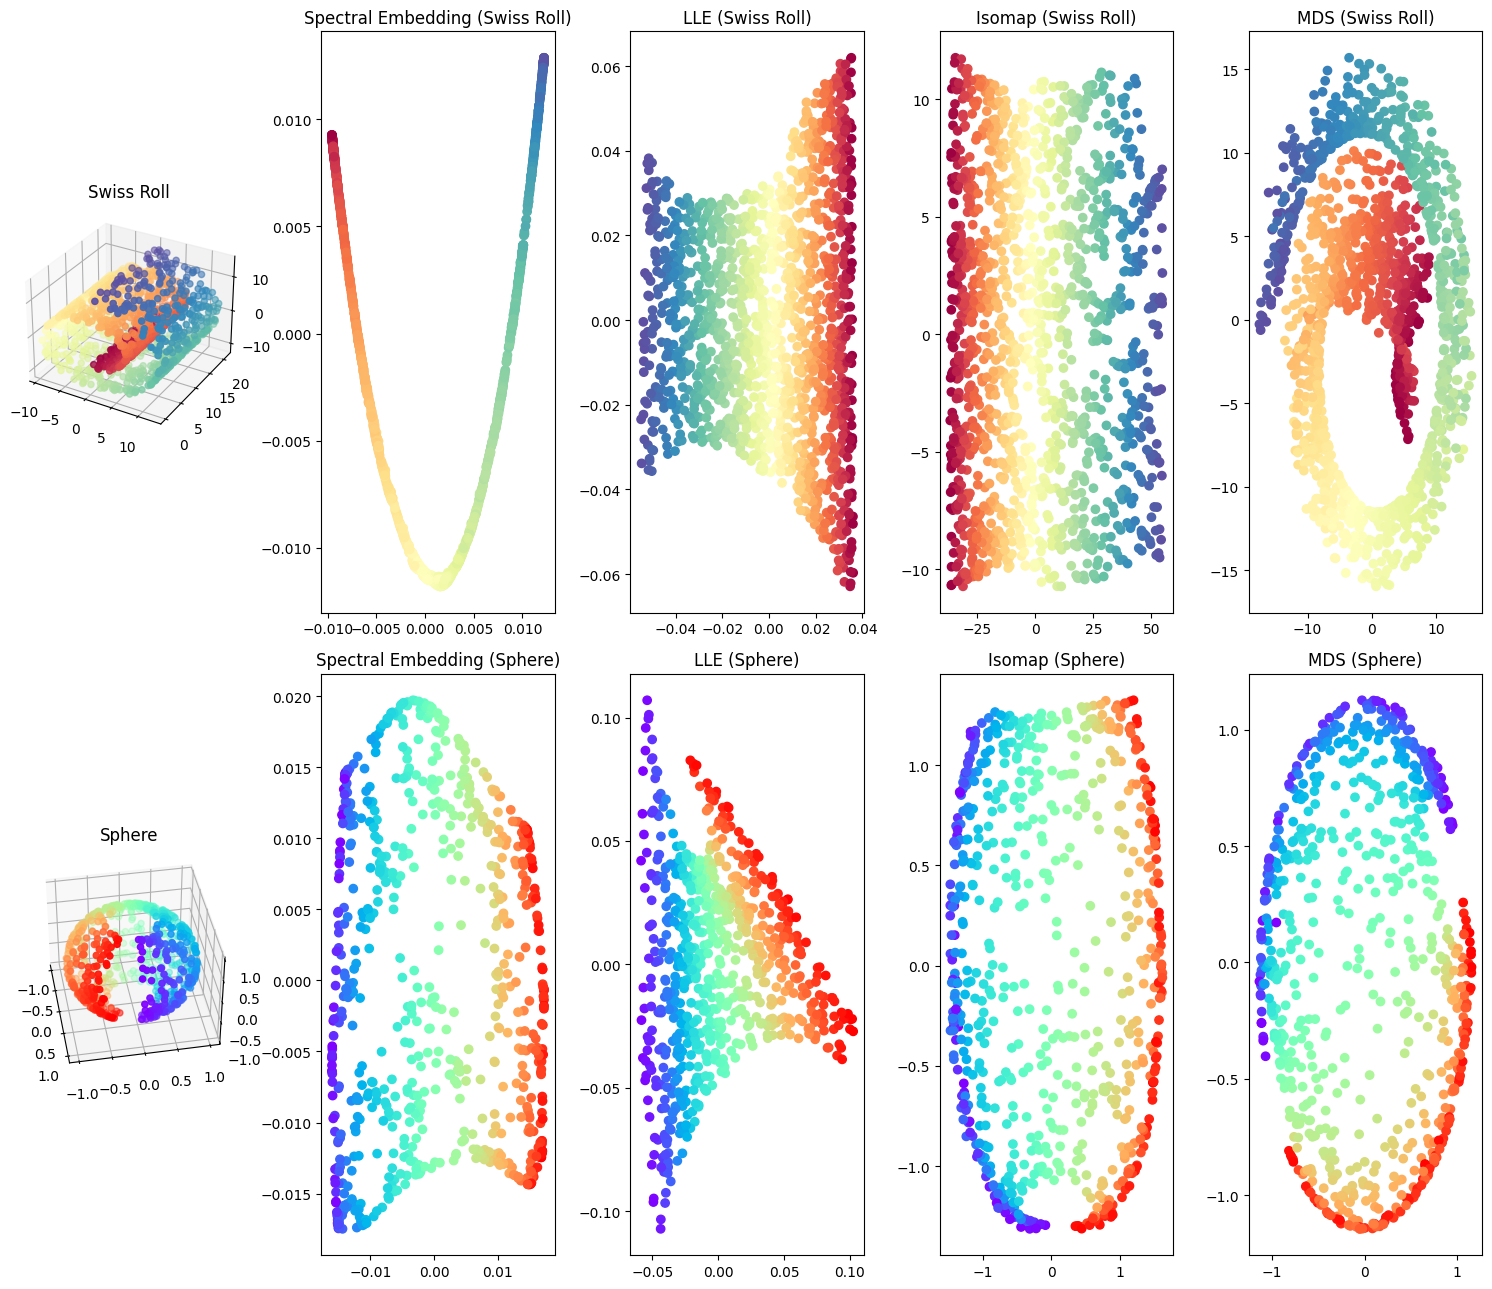

In [62]:
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import SpectralEmbedding
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from mpl_toolkits.mplot3d import Axes3D
from sklearn.utils import check_random_state
from sklearn import manifold, datasets
from sklearn.manifold import Isomap
from sklearn.manifold import MDS
import numpy as np

rs = 0

# ----------------------------------------------------------------------
# Swiss roll

X1, color = datasets.make_swiss_roll(n_samples=1500)

# ----------------------------------------------------------------------
# Sphere

n_samples = 1000

# Create our sphere.
random_state = check_random_state(0)
p = random_state.rand(n_samples) * (2 * np.pi - 0.55)
t = random_state.rand(n_samples) * np.pi

# Sever the poles from the sphere.
indices = (t < (np.pi - (np.pi / 8))) & (t > ((np.pi / 8)))
colors = p[indices]
x, y, z = (
    np.sin(t[indices]) * np.cos(p[indices]),
    np.sin(t[indices]) * np.sin(p[indices]),
    np.cos(t[indices]),
)

X2 = np.array([x, y, z]).T


# ----------------------------------------------------------------------
# Spectral Embedding


spectral_embedding = SpectralEmbedding(n_components = 2, n_neighbors = 12, random_state = rs)
X1_se = spectral_embedding.fit_transform(X1)
X2_se = spectral_embedding.fit_transform(X2)


# ----------------------------------------------------------------------
# Locally linear embedding


lle = LocallyLinearEmbedding(n_neighbors = 12, n_components = 2, method='standard', random_state = rs)
X1_lle = lle.fit_transform(X1)
X2_lle = lle.fit_transform(X2)


# ----------------------------------------------------------------------
# Isomap 

isomap = Isomap(n_neighbors=12, n_components=2)
X1_iso = isomap.fit_transform(X1)
X2_iso = isomap.fit_transform(X2)

# ----------------------------------------------------------------------
# MDS

mds = MDS(n_components=2, n_init = 1, max_iter=100, random_state = rs)
X1_mds = mds.fit_transform(X1)
X2_mds = mds.fit_transform(X2)



# -----------------------------------------------------------------------

# Plot results

fig = plt.figure(figsize=(15, 13))

# Plot Swiss roll 3D
ax = fig.add_subplot(2, 5, 1, projection="3d")
ax.scatter(X1[:, 0], X1[:, 1], X1[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Swiss Roll")

# Plot Sphere 3D
ax = fig.add_subplot(2, 5, 6, projection="3d")
ax.scatter(x, y, z, c=colors, cmap=plt.cm.rainbow)
ax.view_init(40, -10)
ax.set_title("Sphere")

# Plot Spectral Embedding (Swiss Roll)
ax = fig.add_subplot(2, 5, 2)
ax.scatter(X1_se[:, 0], X1_se[:, 1], c=color, cmap=plt.cm.Spectral)
ax.set_title("Spectral Embedding (Swiss Roll)")

# Plot Spectral Embedding (Sphere)
ax = fig.add_subplot(2, 5, 7)
ax.scatter(X2_se[:, 0], X2_se[:, 1], c=colors, cmap=plt.cm.rainbow)
ax.set_title("Spectral Embedding (Sphere)")

# Plot LLE (Swiss Roll)
ax = fig.add_subplot(2, 5, 3)
ax.scatter(X1_lle[:, 0], X1_lle[:, 1], c=color, cmap=plt.cm.Spectral)
ax.set_title("LLE (Swiss Roll)")

# Plot LLE (Sphere)
ax = fig.add_subplot(2, 5, 8)
ax.scatter(X2_lle[:, 0], X2_lle[:, 1], c=colors, cmap=plt.cm.rainbow)
ax.set_title("LLE (Sphere)")

# Plot Isomap (Swiss Roll)
ax = fig.add_subplot(2, 5, 4)
ax.scatter(X1_iso[:, 0], X1_iso[:, 1], c=color, cmap=plt.cm.Spectral)
ax.set_title("Isomap (Swiss Roll)")

# Plot Isomap (Sphere)
ax = fig.add_subplot(2, 5, 9)
ax.scatter(X2_iso[:, 0], X2_iso[:, 1], c=colors, cmap=plt.cm.rainbow)
ax.set_title("Isomap (Sphere)")

# Plot MDS (Swiss Roll)
ax = fig.add_subplot(2, 5, 5)
ax.scatter(X1_mds[:, 0], X1_mds[:, 1], c=color, cmap=plt.cm.Spectral)
ax.set_title("MDS (Swiss Roll)")

# Plot MDS (Sphere)
ax = fig.add_subplot(2, 5, 10)
ax.scatter(X2_mds[:, 0], X2_mds[:, 1], c=colors, cmap=plt.cm.rainbow)
ax.set_title("MDS (Sphere)")

plt.tight_layout()
plt.show()

In [63]:
def plot_embedding_methods(X, methods=['spectral', 'lle', 'isomap', 'mds'], n_neighbors_list=[12]):
    num_rows = len(n_neighbors_list)
    num_cols = len(methods)
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 5*num_rows))
    
    for i, n_neighbors in enumerate(n_neighbors_list):
        for j, method in enumerate(methods):
            ax = axes[i, j] if num_rows > 1 else axes[j]
            
            if method == 'spectral':
                embedding = SpectralEmbedding(n_components=2, n_neighbors=n_neighbors, random_state=rs)
            elif method == 'lle':
                embedding = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2, method='standard', random_state=rs)
            elif method == 'isomap':
                embedding = Isomap(n_neighbors=n_neighbors, n_components=2)
            elif method == 'mds':
                embedding = MDS(n_components=2, n_init=1, max_iter=100, random_state=rs)
            else:
                raise ValueError("Unknown method.")
                
            X_embedded = embedding.fit_transform(X)
            
            # Determinar el cmap basado en el número de filas de X
            cmap = plt.cm.Spectral if X.shape[0] == 1500 else plt.cm.rainbow
            # Determinar el parámetro c basado en el número de filas de X
            c_param = color if X.shape[0] == 1500 else colors
            
            if X_embedded.shape[1] == 3:
                ax = fig.add_subplot(num_rows, num_cols, i*num_cols + j + 1, projection="3d")
                ax.scatter(X_embedded[:, 0], X_embedded[:, 1], X_embedded[:, 2], c=c_param, cmap=cmap)
            else:
                ax.scatter(X_embedded[:, 0], X_embedded[:, 1], c=c_param, cmap=cmap)
                
            ax.set_title(f"{method.capitalize()} (Neighbors={n_neighbors})")
    
    plt.tight_layout()
    plt.show()


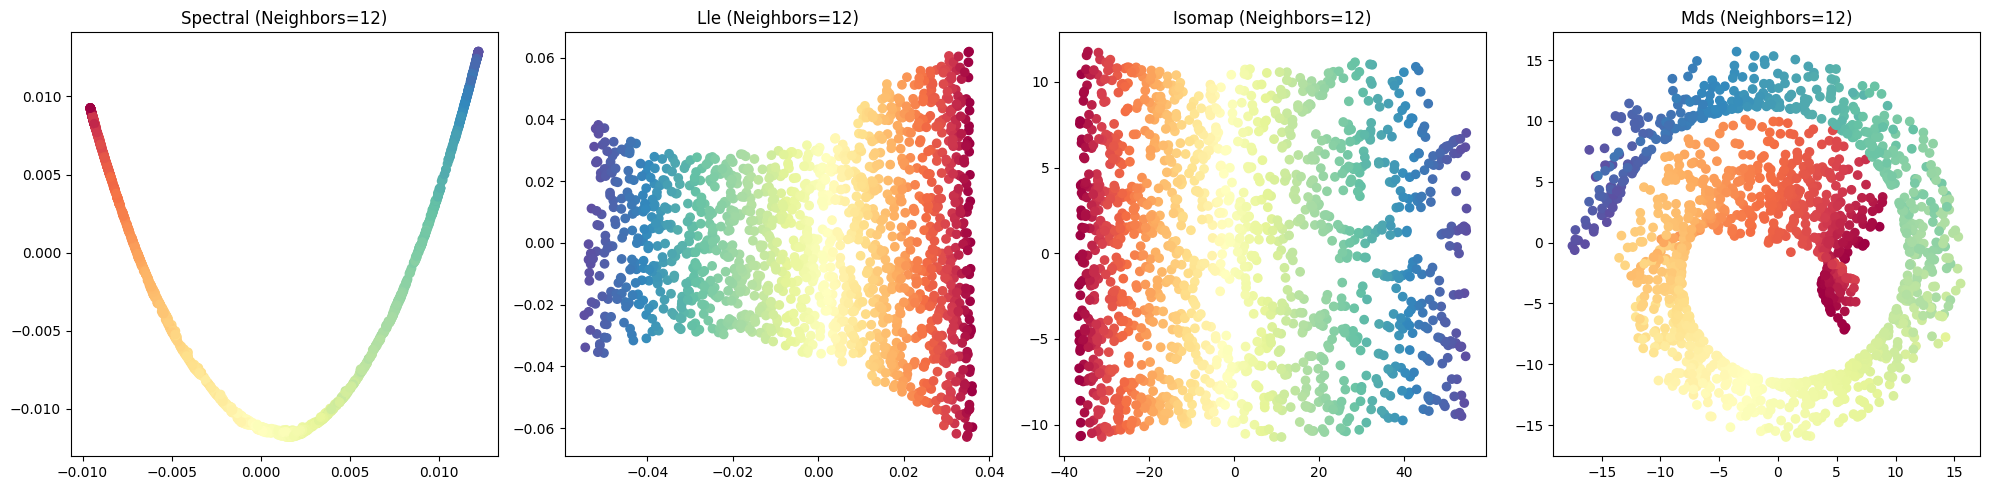

In [64]:
plot_embedding_methods(X1)

## 2. Variantes de LLE.

Información recuperada de https://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html.

method{‘standard’, ‘hessian’, ‘modified’, ‘ltsa’}, default=’standard’

- standard: use the standard locally linear embedding algorithm. see reference [1]

- hessian: use the Hessian eigenmap method. This method requires n_neighbors > n_components * (1 + (n_components + 1) / 2. see reference [2]

- modified: use the modified locally linear embedding algorithm. see reference [3]

- ltsa: use local tangent space alignment algorithm. see reference [4]

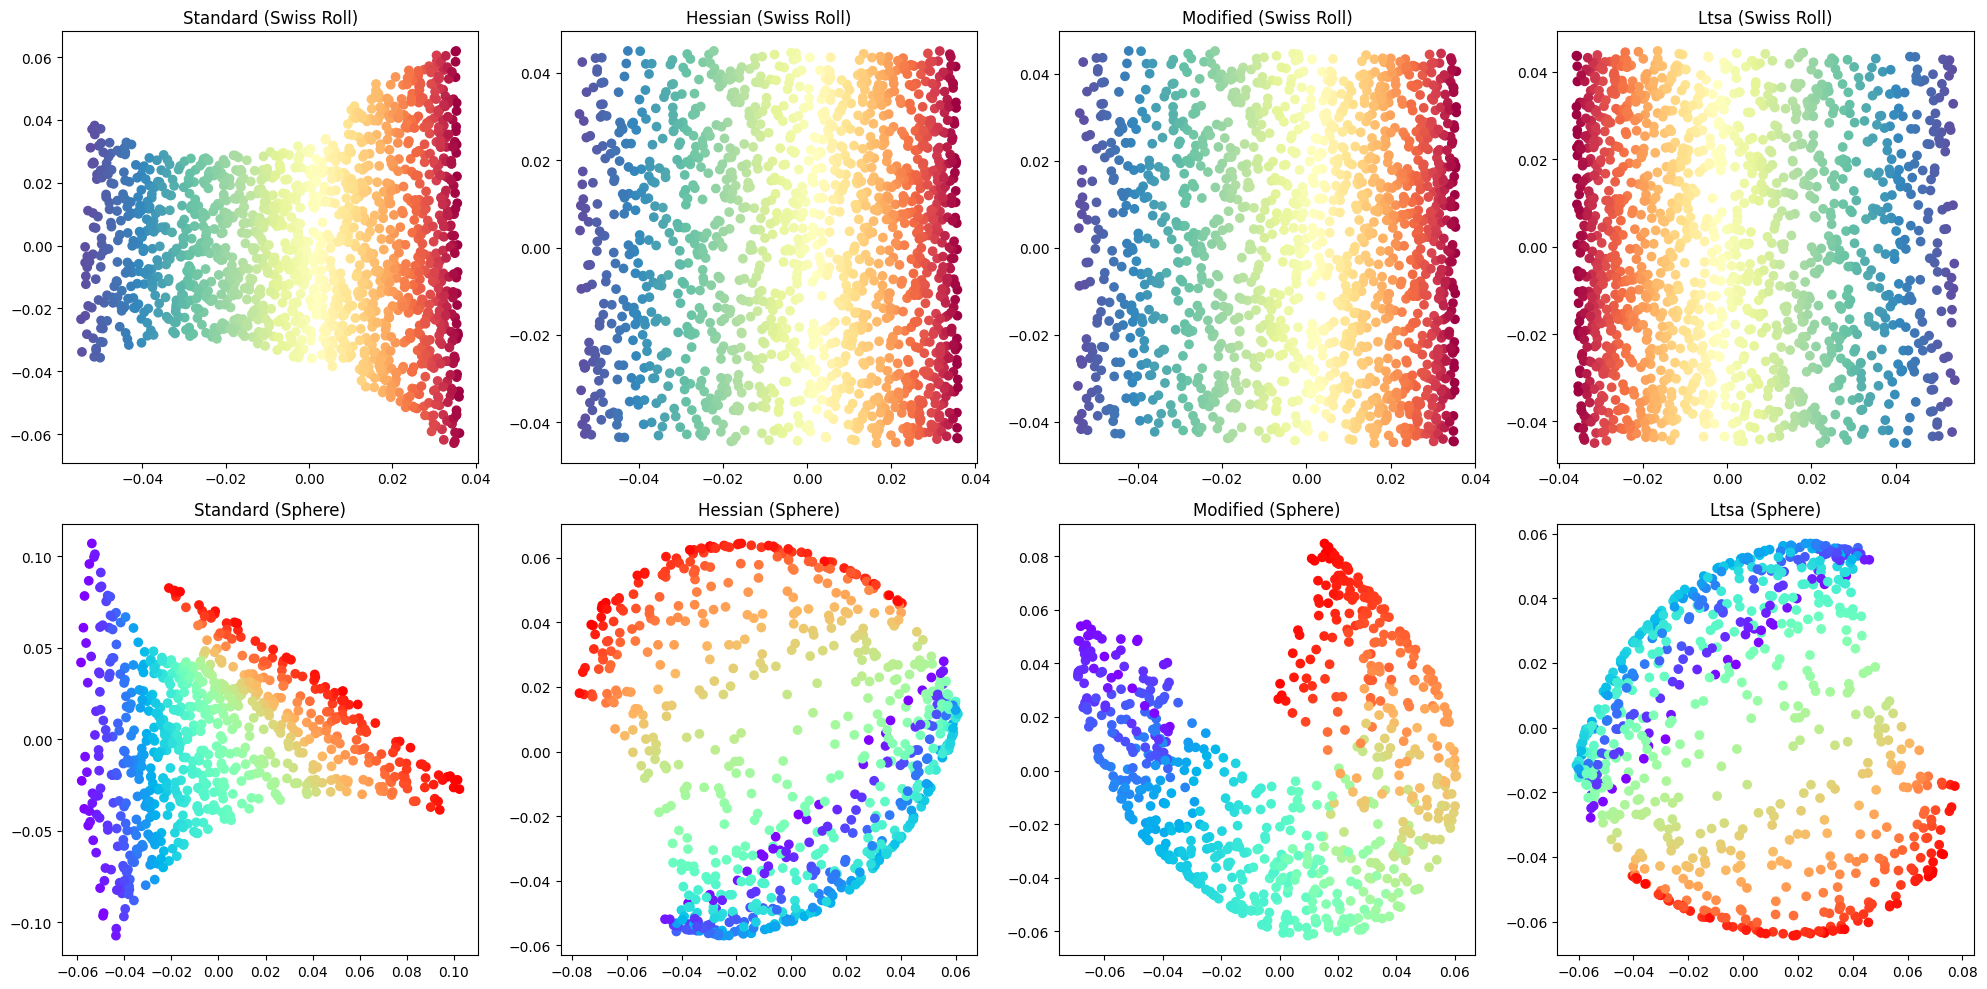

In [69]:
# Applying LLE variants

LLE = {}

for method in ['standard', 'hessian', 'modified', 'ltsa']:
    lle = LocallyLinearEmbedding(n_neighbors = 12, n_components = 2, method = method, random_state = rs)
    X1_lle = lle.fit_transform(X1)
    X2_lle = lle.fit_transform(X2)
    LLE[method] = (X1_lle, X2_lle)

# ----------------------------------------------------------------------
# Plotting results

fig, axs = plt.subplots(2, 4, figsize=(20, 10))

for i, method in enumerate(LLE.keys()):
    X1_lle, X2_lle = LLE[method]
    axs[0, i].scatter(X1_lle[:, 0], X1_lle[:, 1], c=color, cmap=plt.cm.Spectral)
    axs[0, i].set_title(f"{method.capitalize()} (Swiss Roll)")

    axs[1, i].scatter(X2_lle[:, 0], X2_lle[:, 1], c=colors, cmap=plt.cm.rainbow)
    axs[1, i].set_title(f"{method.capitalize()} (Sphere)")

plt.tight_layout()
plt.show()

## 3. Responde a las preguntas.

Comenta los siguientes puntos:

     1)¿Qué algoritmo de manifold NO LINEAL realiza una representación más próxima a la real?

En general, no hay un algoritmo de manifold no lineal que siempre produzca una representación más próxima a la realidad, ya que la eficacia de cada algoritmo depende de la estructura específica de los datos y del problema en cuestión. 

Sin embargo, en muchos casos, el algoritmo Isomap tiende a producir representaciones más precisas en comparación con otros métodos de manifold no lineal, especialmente cuando los datos tienen una estructura intrínseca que se asemeja a una variedad con una topología subyacente compleja. Esto se debe a que Isomap preserva las distancias geodésicas en el espacio de los datos, lo que puede ser beneficioso para la preservación de la estructura subyacente de los datos en un espacio de menor dimensión.


En nuestro caso particular, vemos cómo ISOMAP realiza perfectamente lo que sería el pliegue de las figuras. En el caso del 'Swiss Roll' vemos cómo nos muestra perfectamente el plano de lo que sería estirarlo. Por otra parte, en la esfera se muestra también de forma muy buena lo que sería la proyección a dos dimensiones.

     2)¿Por qué la representación de MDS es tan diferente a la del resto?

MDS se centra en preservar las distancias entre todos los pares de puntos en el espacio original.

LLE, Isomap y Spectral Embedding se enfocan en preservar diferentes tipos de relaciones: LLE preserva relaciones locales, Isomap preserva distancias geodésicas y Spectral Embedding se enfoca en la estructura global y local utilizando información espectral.

MDS además es un método lineal, se realizan transformaciones lineales de los datos.

    3) Modifica el número de vecinos y compara los resultados

`SWISS ROLL`

c:\Users\jesus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


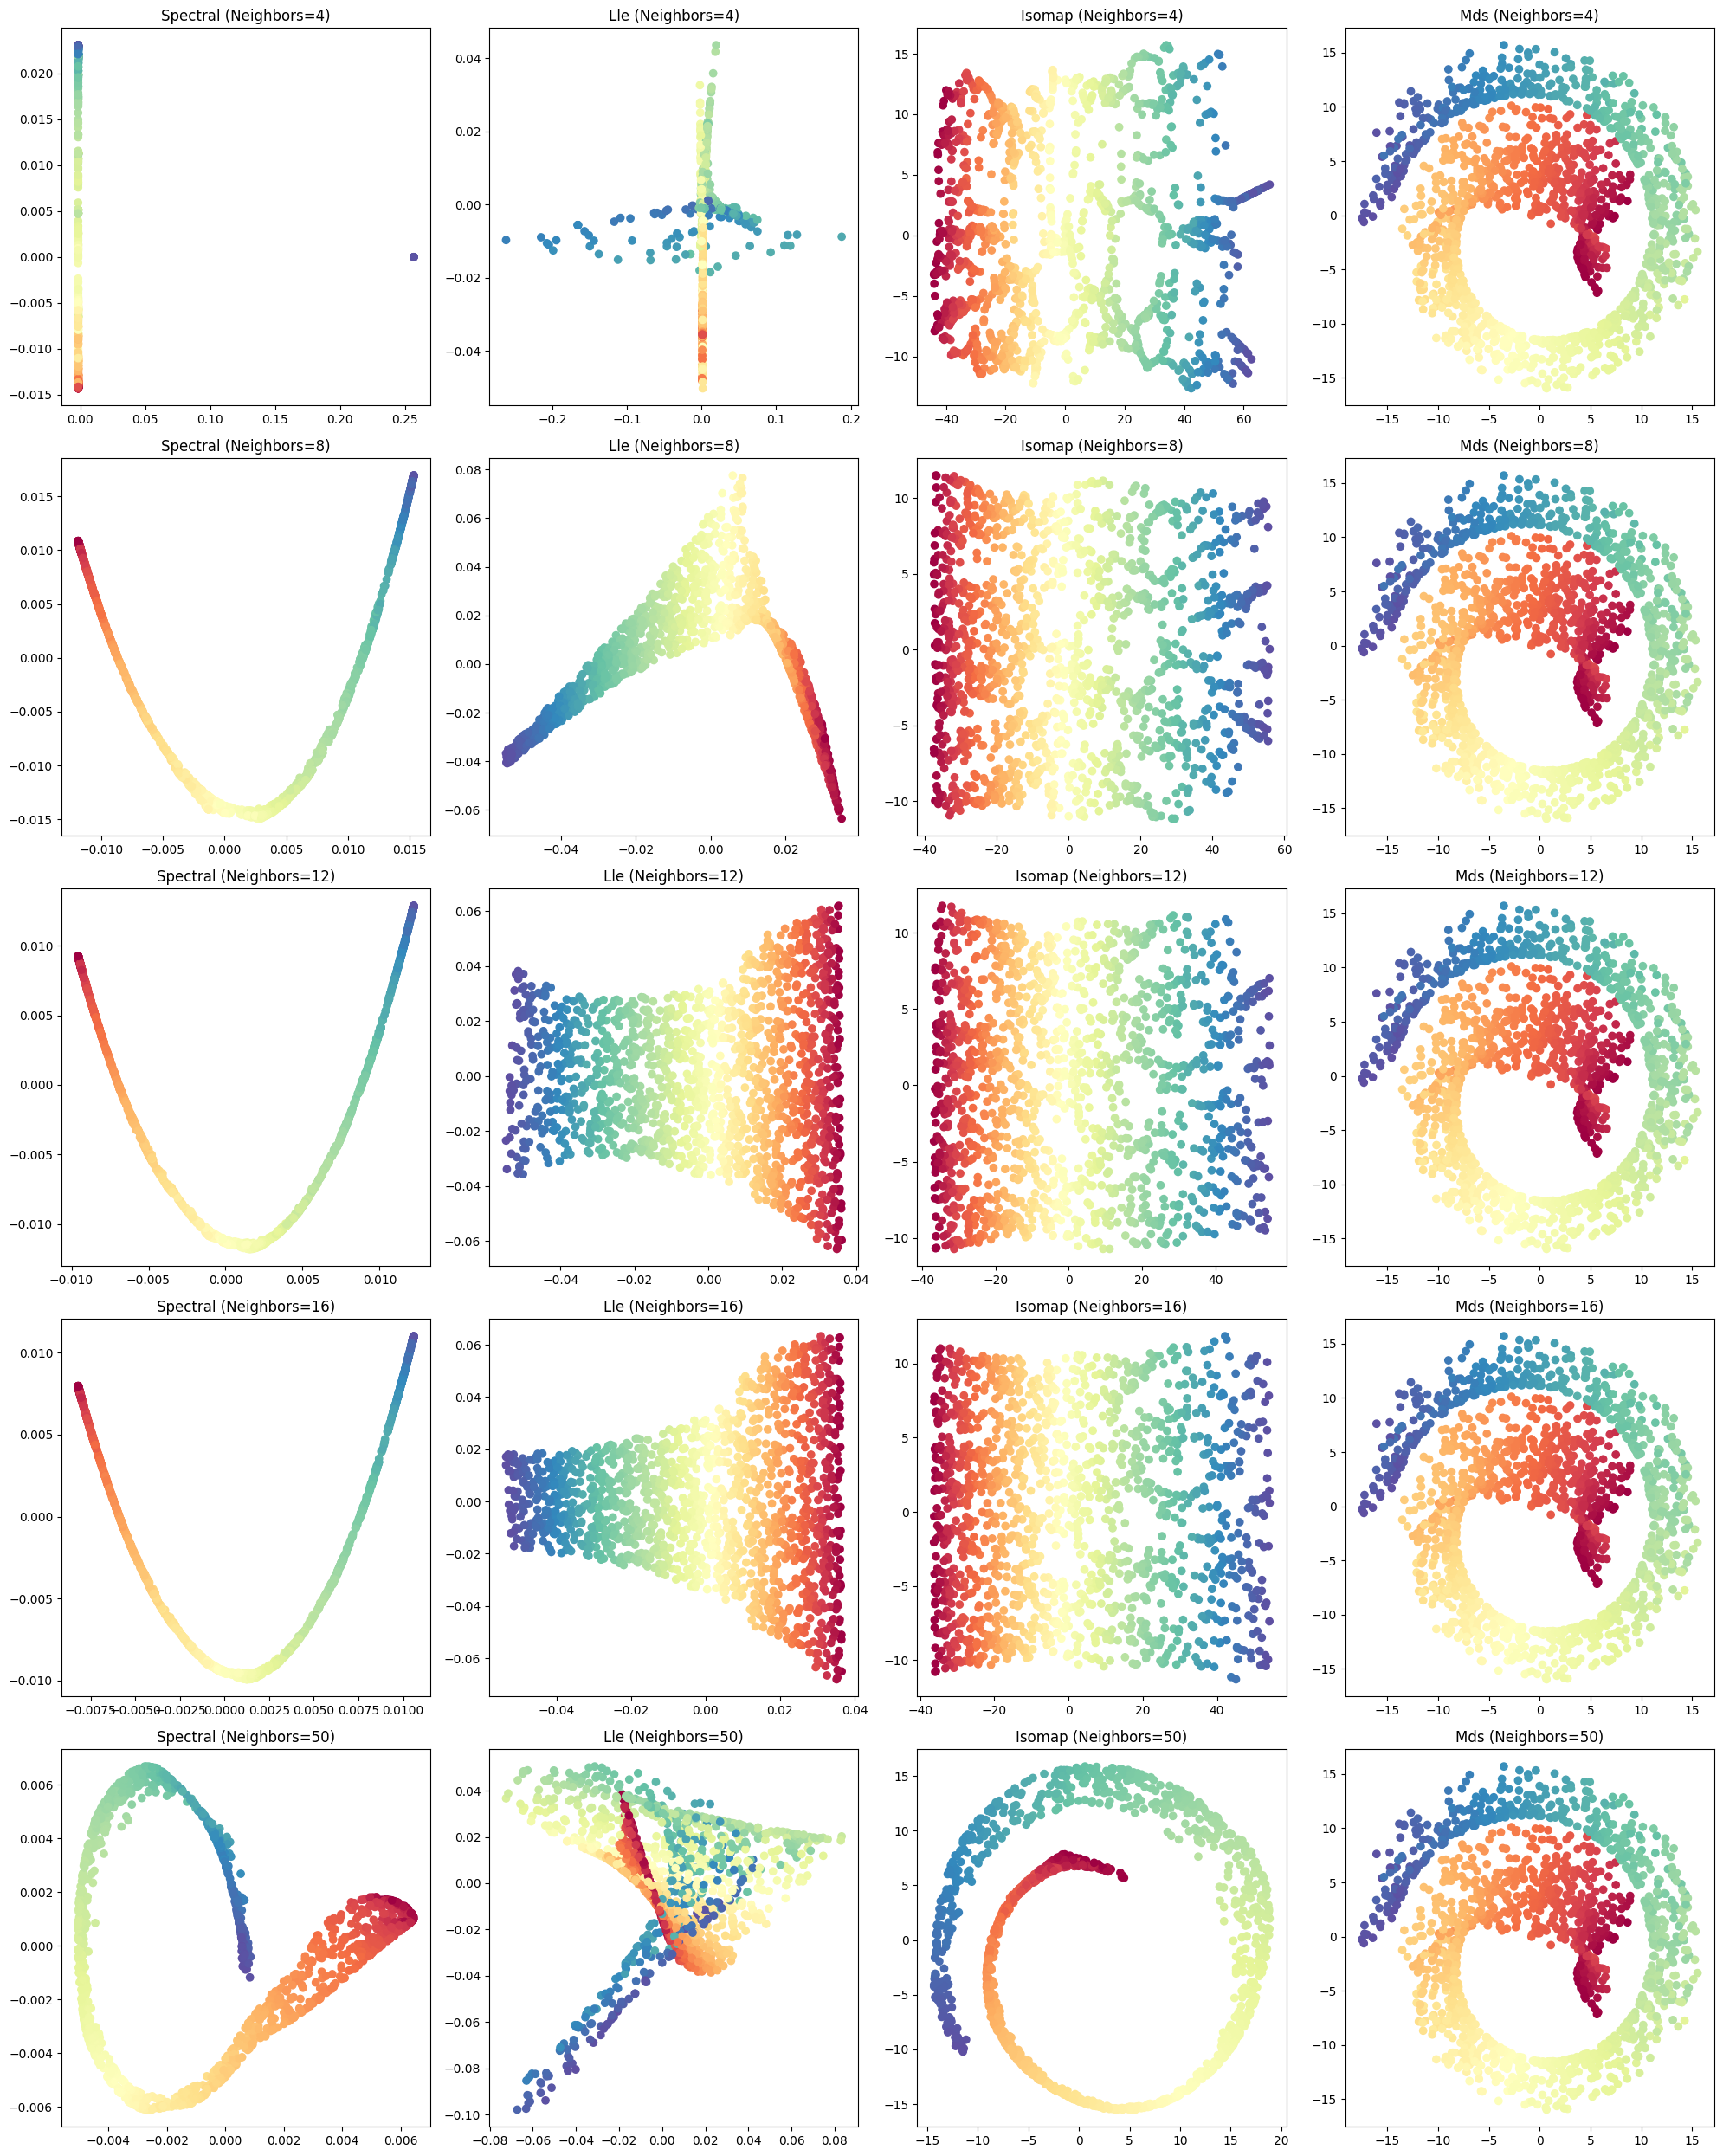

In [66]:
plot_embedding_methods(X1, n_neighbors_list = [4, 8, 12, 16, 50])

Vemos que con un número pequeño de vecinos las cosas no funcionan del todo bien, incluso para ISOMAP. Cambiar el valor de n_neighbors en Isomap puede afectar significativamente los resultados de la reducción de dimensionalidad. Un valor más bajo de n_neighbors tiende a capturar estructuras locales en los datos, mientras que un valor más alto captura estructuras más globales. 

Ahora bien, un número excesivo de vecinos puede capturar demasiadas conexiones, pudiendo introducir ruido o información redundante.

Es curioso ver además que con MDS no varía nada manteniendo el random_state y modificando el número de vecinos como argumento.

``SPHERE``

c:\Users\jesus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


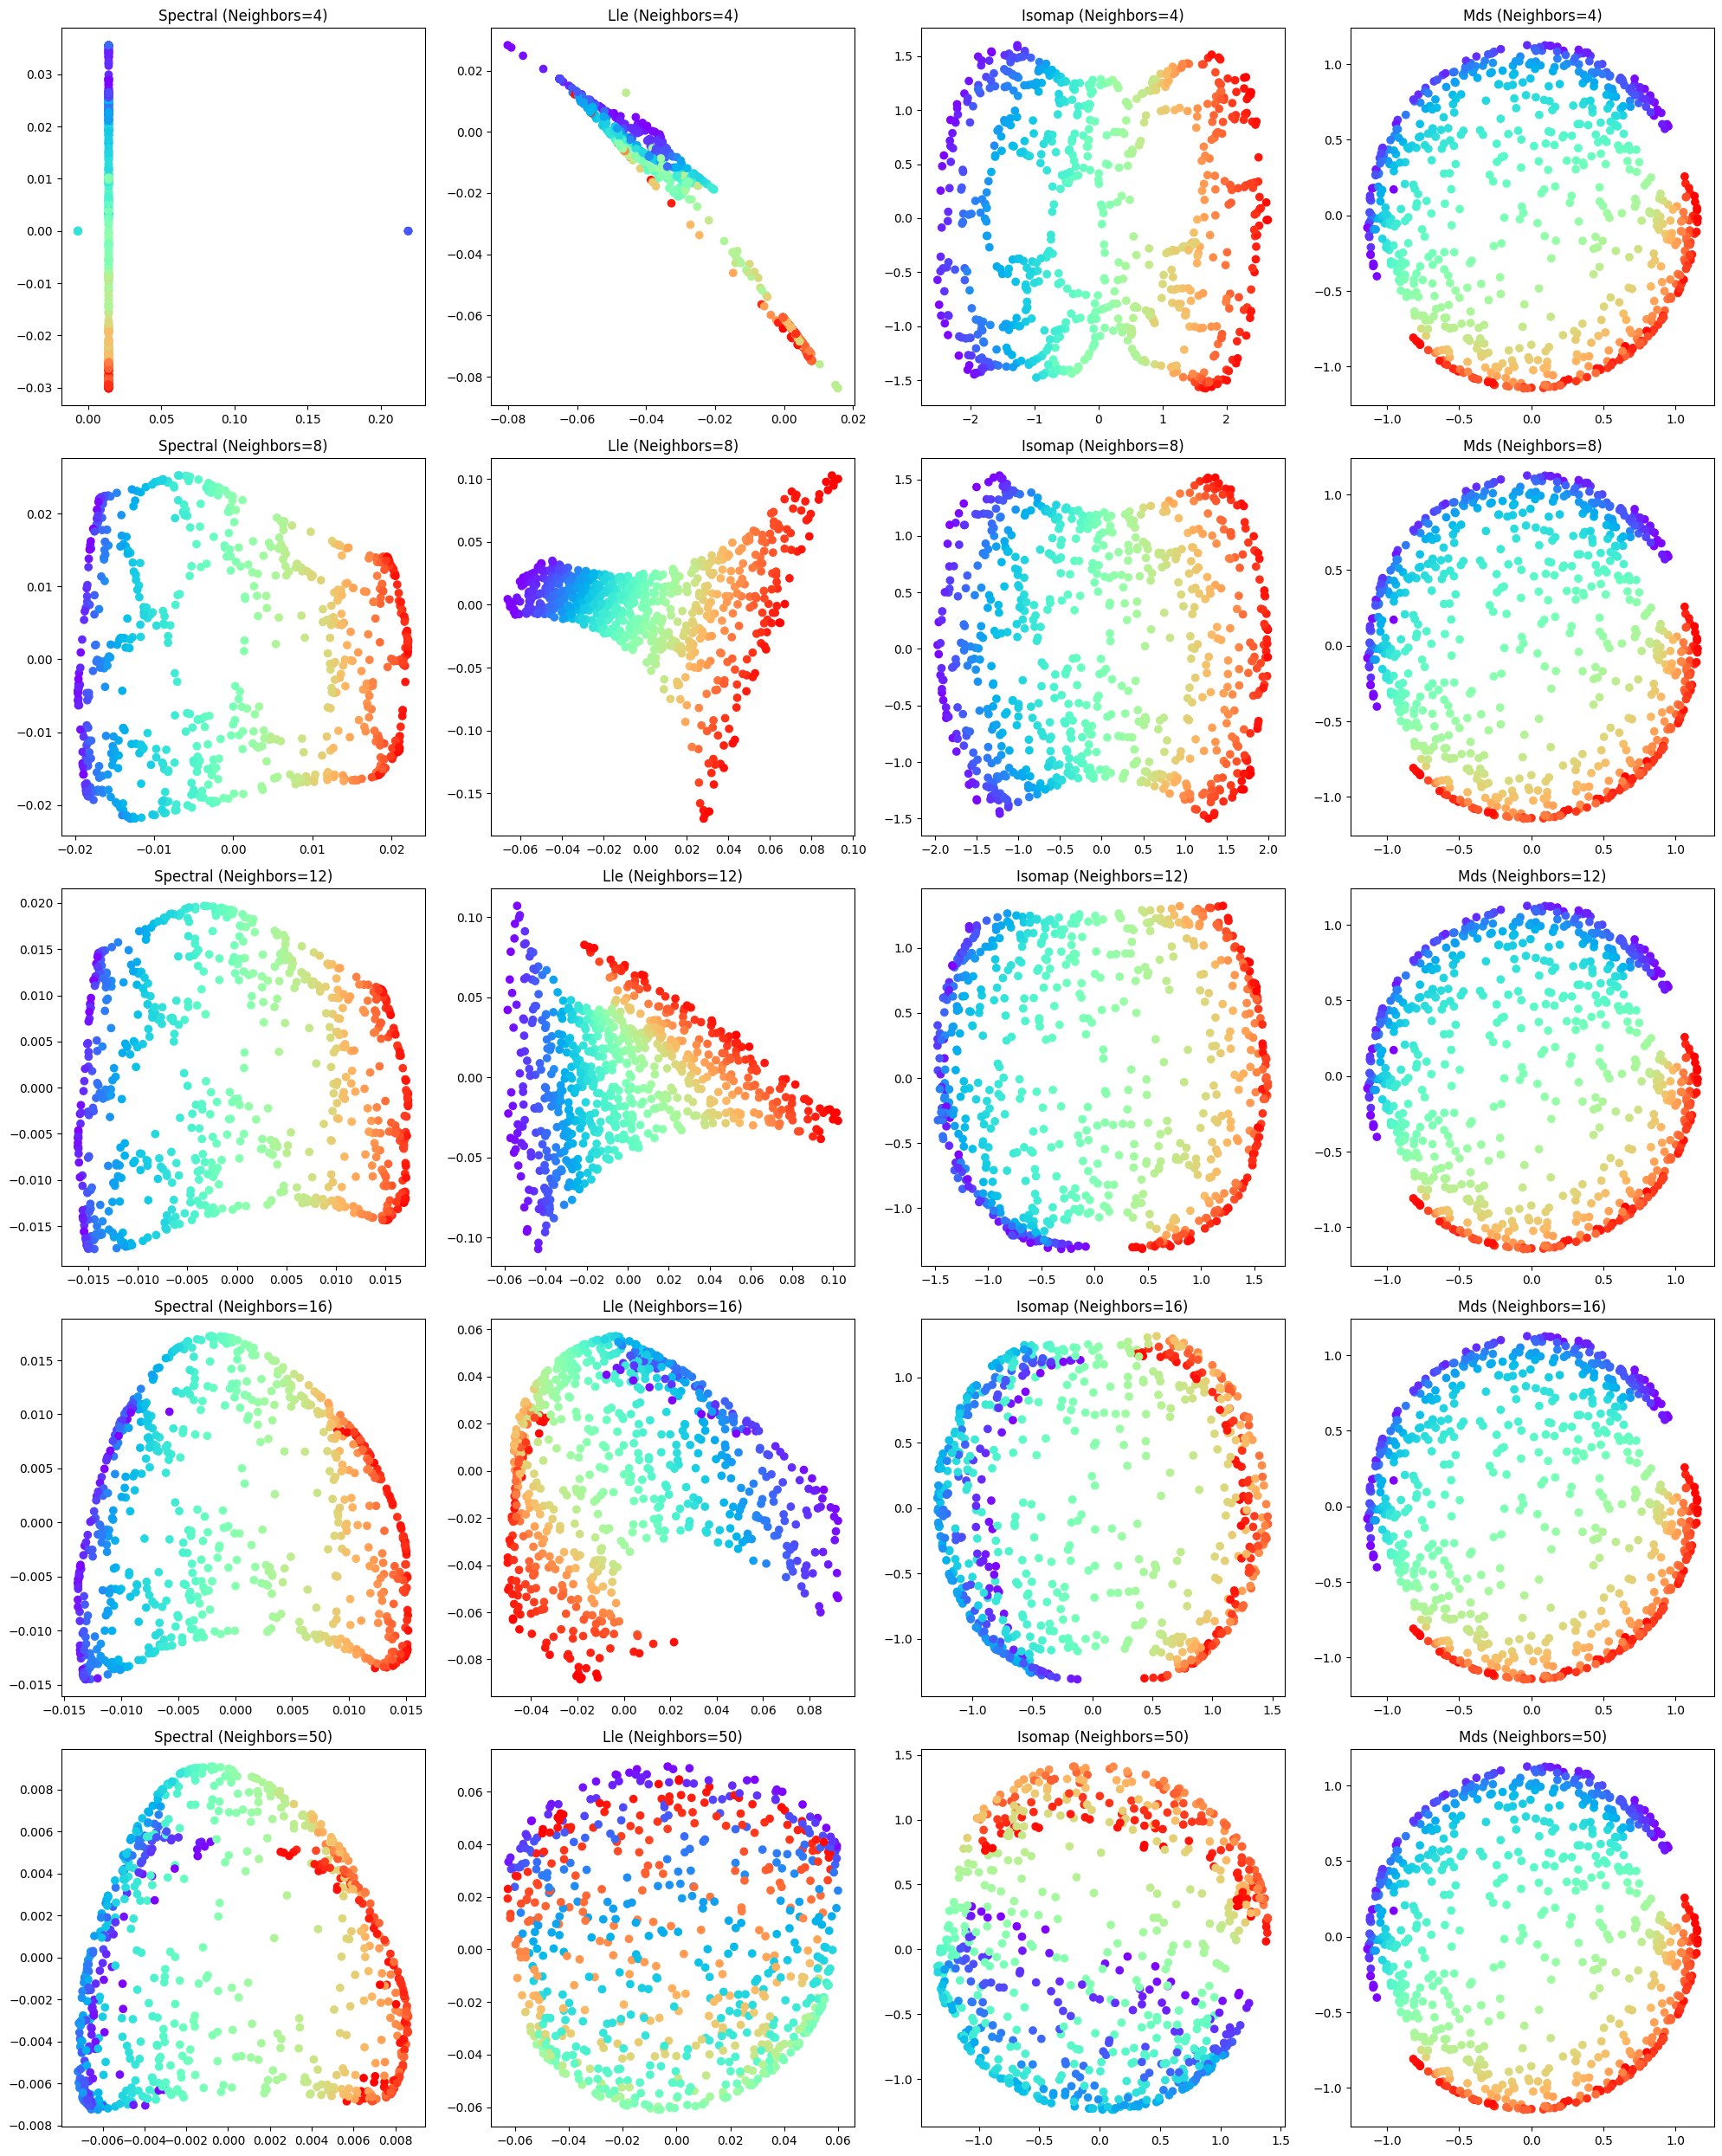

In [67]:
plot_embedding_methods(X2, n_neighbors_list = [4, 8, 12, 16, 50])

    4) ¿Qué variante de LLE hace una reducción de dimensionalidad más próxima a la real?

El Standard suele funcionar bien con datos que estén aproximadamente distribuidos de manera lineal, por lo que es el que obtiene peores resultados.

Los otros obtienen resultados bastante similares y en ningún caso llegan al nivel de ISOMAP en cuanto a bondad de representación.